# Implementation of t-SNE(t-distributed stochastic neighbor embedding) 
**Dimensionality reduction- Nonlinear Dimensionality Reduction**
>* NON LINEAR
>* UNSUPERVISED

   
   **Advantages of dimensionality reduction**
1. It reduces the time and storage space required.
2. Removal of multi-collinearity improves the interpretation of the parameters of the machine learning model.
3. It becomes easier to visualize the data when reduced to very low dimensions such as 2D or 3D.
4. It avoids the curse of dimensionality.

#### UNDERSTANDING t-SNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) is an algorithm used for dimensionality reduction. It is used for high dimensional datasets (images for example).
It is more expensive than PCA and LDA but it gives better results for complex data as you will see below.    
Reference to understand algorithm : [t-SNE](https://www.youtube.com/watch?v=NEaUSP4YerM)


t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding

Drawbacks :
- It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data)to reduce the number of dimensions to a reasonable amount (e.g. 50)if the number of features is very high.
- Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with only a few thousand input objects; beyond that, learning becomes too slow to be practical (and the memory requirements become too large

**Working process of t-SNE:**
 
    Step 1 - Compute similarity matrix between all feature vectors
    
    Step 2 - Compute similarity matrix from map points
    
    Step 3 - Use gradient descent to minimimze distance between matrices

## Practical Implementation
### DATA

We will be using a [pokemon dataset](https://www.kaggle.com/abcsds/pokemon) from the kaggle which has a very good collection of datasets.

Features used in this project:
- #
- Name
- Type 1
- Total
- HP
- Attack
- Defense
- Sp. Atk
- Sp. Def
- Speed
- Generation
- Legendary

### Requirement:
- numpy
- pandas
- Matplotlib
- seaborn
- scikit learn

### IMPORT THE LIBRARIES

In [32]:
"""# Import our relevant libraries"""

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


### LOAD DATA

In [33]:
"""read the csv file using pandas library"""

df = pd.read_csv('input/Pokemon.csv').drop('Type 2', axis=1)

### DATA EXPLORATION

In [34]:
""" Display a description of the dataset"""

df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [35]:
"""Rename the variables with spaces in names"""

df['Type1Id'] = df['Type 1'].rank(method='dense').astype(int)
df.head()

,#,Name,Type 1,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type1Id
0,1,Bulbasaur,Grass,318,45,49,49,65,65,45,1,False,10
1,2,Ivysaur,Grass,405,60,62,63,80,80,60,1,False,10
2,3,Venusaur,Grass,525,80,82,83,100,100,80,1,False,10
3,3,VenusaurMega Venusaur,Grass,625,80,100,123,122,120,80,1,False,10
4,4,Charmander,Fire,309,39,52,43,60,50,65,1,False,7


# EDA

In [22]:
"""make a list of features you want to use for this project we will be using ('Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'Legendary') as features and ('Type1Id') as target """

features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 
            'Legendary']
targets  = ['Type1Id']

""" As out tsne layout strongly depends on whether there are legendary pokemons in a dataset, 
    let's only consider non legendary pokemons. This is kind of decision is project specific and 
    should have some idea of the background of project"""

df = df[~df['Legendary']]

In [24]:
"""Normalise the features using StandarDcalar function"""

df_norm = df.copy()
df_norm[features] = StandardScaler().fit(df[features]).transform(df[features])

**Fitting features for both PCA and TSNE**

In [25]:
""" fit the features for PCA AND TSNE function with lower dimension = 2 and learning rate = 600 """
X_tsne = TSNE(learning_rate=600, n_components=2).fit_transform(df_norm[features])
X_pca = PCA().fit_transform(df_norm[features])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

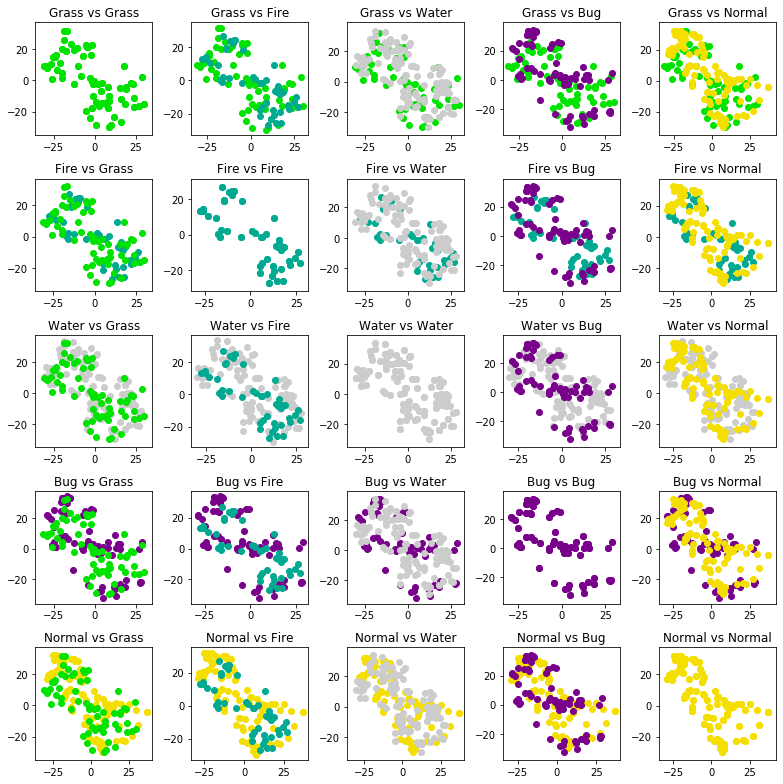

In [39]:
""" write the code to understand the relationship and dependency of differnt classes of target("Type1Id") 
    by ploting the scatter plot of each pair of classes ."""

fig = figure(figsize=(11, 11))

cmap = plt.get_cmap('nipy_spectral')
types1 = df['Type 1'].unique()
type1_ids = df['Type1Id'].unique()
num_types1 = len(types1)

rows, cols = 5, 5
num = 1
for row, t1_id, t1 in zip(range(rows), type1_ids, types1):
    for col, t2_id, t2 in zip(range(cols), type1_ids, types1):
        subplot(rows,cols,num)
        X_i = X_tsne[np.where(df['Type1Id'] == t1_id)[0]]
        X_j = X_tsne[np.where(df['Type1Id'] == t2_id)[0]]
        scatter(X_i[:, 0], X_i[:, 1], c=cmap(t1_id / num_types1))
        scatter(X_j[:, 0], X_j[:, 1], c=cmap(t2_id / num_types1))
        title(str(t1) + ' vs ' + str(t2))
        num += 1
fig.tight_layout()

**Neither tSNE or PCA are clustering methods even if in practice you can use them to see if/how your data form clusters.**

In [40]:
""" To visualise better and understand the TSNE and PCA better. Apply Kmeans algorithm to both the dataset
    after doing respective dimensionality reduction technique with 4 clusters"""

num_clusters = 4
kmeans_tsne = KMeans(n_clusters=num_clusters).fit(X_tsne)
kmeans_pca = KMeans(n_clusters=num_clusters).fit(X_pca)

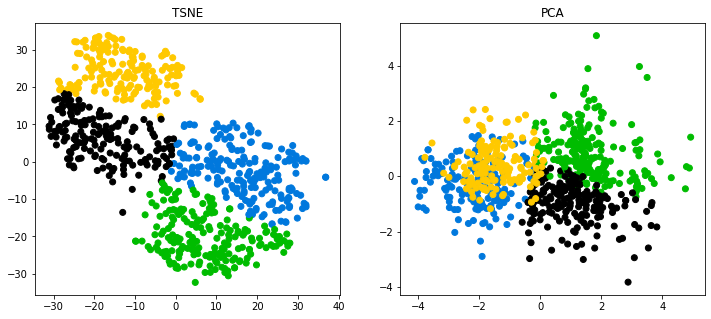

In [41]:
""" Plot the scatter plot for both PCA and TSNE after clustering using Kmeans method
    to understand through visualisation"""

figure(figsize=(12, 5))
cmap = plt.get_cmap('nipy_spectral')

subplot(1,2,1)
scatter(X_tsne[:, 0], X_tsne[:, 1], c=cmap(kmeans_tsne.labels_ / num_clusters))
title('TSNE')
subplot(1,2,2)
scatter(X_pca[:, 0], X_pca[:, 1], c=cmap(kmeans_pca.labels_ / num_clusters))
title('PCA');

**OBSEVATIONS:**
    - tSNE clusters are well defined compared to PCA clusters

In [42]:
""" calculate the mean for each classes of the target feature"""

df_norm['tsne_cluster'] = kmeans_tsne.labels_
df_norm['pca_cluster'] = kmeans_pca.labels_
df_tsne_mean = df_norm.groupby('tsne_cluster').mean()
df_pca_mean = df_norm.groupby('pca_cluster').mean()

**Beneath there are mean values of different pokemon stats for each cluster.**

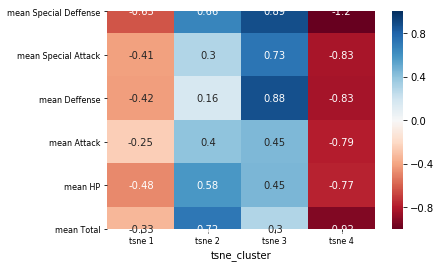

In [61]:
""" list the features you are going to use. we will be using('Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def')  """
features0 = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def']

"""plot the heat map of each feature  against the lower dimension component  AFTER TSNE """

figure(figsize=(6, 4))
ax = sns.heatmap(df_tsne_mean[features0].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['tsne ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=8);
ax.set_yticklabels(['mean Total', 'mean HP', 'mean Attack', 'mean Deffense', 'mean Special Attack',
                    'mean Special Deffense'][::-1], rotation=0, fontsize=8);

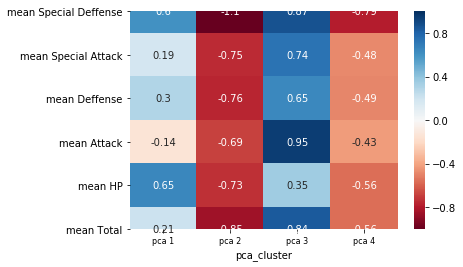

In [59]:
"""plot the heat map of each feature  against the lower dimension component  AFTER PCA """

figure(figsize=(6, 4))
ax = sns.heatmap(df_pca_mean[features0].transpose(), 
                 center=0, cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.set_xticklabels(['pca ' + str(i + 1) for i in range(num_clusters) ], rotation=0, fontsize=8);
ax.set_yticklabels(['mean Total', 'mean HP', 'mean Attack', 'mean Deffense', 'mean Special Attack',
                    'mean Special Deffense'][::-1], rotation=0, fontsize=10);

**OBSERVATION**

Both Tsne and Pca distinguish simular pokemon clusters: two high stats pokemons and two low stats pokemons:
    1. Pokemons with good overall stats and especially high defense and HP.
    2. Pokemons with good overall stats and especially high Total and Special Attack.
    3. Pokemons with bad overall stats and especially low Total and Special Attack.
    4. Pokemons with very bad overall stats and especially low Total and Attack.

### REFERENCE

- https://distill.pub/2016/misread-tsne/